# Packages:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import min

## Input Resolution:

In [21]:
resolution = int(input('Resolution:'))
X = np.arange(resolution)

# Functions:

### For Relaxation:

In [4]:
def relax(i):
    if i in range(1,layer.shape[0]-1):
        search = np.where(layer == min([layer[i-1], layer[i], layer[i+1]]))[0]
        if i in search:
            minimum_index = i
        elif search.shape == (2,):
            minimum_index = np.random.choice(search)
        else:
            minimum_index = search

    elif i == 0:
        minimum_index = np.where(layer == min([layer[0], layer[1]]))[0][0]

    else:
        minimum_index = np.where(layer == min([layer[-2], layer[-1]]))[0][::-1][0]


    layer[minimum_index] += 1

### For Isolation:

In [5]:
def isolate(x):
    if x in range(1,image.shape[1]-1):
        if search[0].shape == (0,):
            image[0,x] = 1
        else:
            y_max = search[0].max()
            if image[y_max, x] == 1:
                image[y_max + 1,x] = 1
            else:
                image[y_max,x] = 1

### For Isolation with Random Walk:

In [7]:
displace = np.array([-1,0,1])

def random_walk(point):
    if point[1] == resolution-1:
        d = np.random.choice(displace[:2])
        return [point[0]+1, point[1]+d]
    elif point[1] == 0:
        d = np.random.choice(displace[1:])
        return [point[0]+1, point[1]+d]
    else:
        d = np.random.choice(displace)
        return [point[0]+1, point[1]+d]

def scan(point):
    if point[0] == int(resolution*3/4)-1:
        return False
    elif point[1] == resolution-1:
        return True
    elif 1 in [image[point[0]+1, point[1]], image[point[0], point[1]-1], image[point[0], point[1]+1]]:
        return False
    else:
        return True

### For Competitive:

In [6]:
def free_path(height):
    return np.arange(height, -1, -1)

# Random Ballistic Deposition:

In [8]:
layer = np.zeros(resolution)
for _ in range(100000):
    x = np.random.randint(0,resolution)
    layer[x] += 1

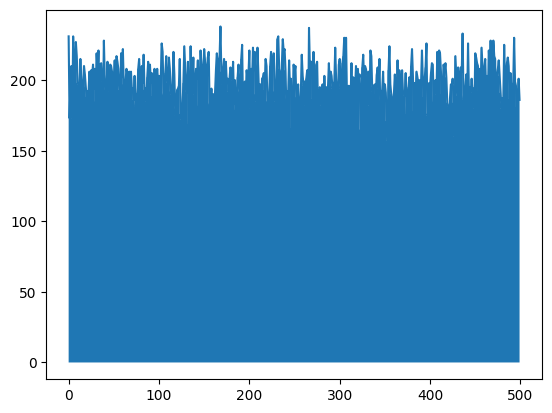

In [9]:
plt.plot(X, layer)
plt.fill_between(X, layer, step='pre')

# Ballistic Deposition with Relaxation:

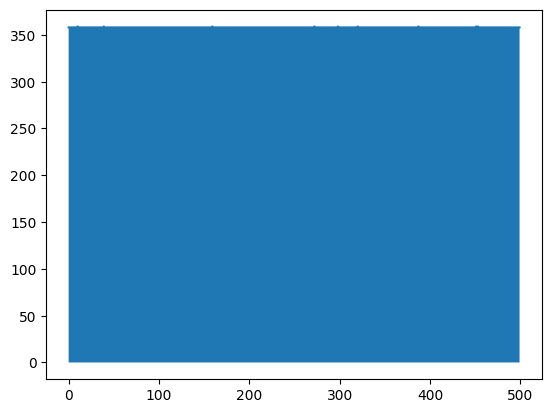

In [10]:
layer = np.zeros(resolution)
for _ in range(10000):
    x = np.random.randint(0,resolution)
    relax(x)
plt.plot(X, layer)
plt.fill_between(X, layer, step='pre')

# ‌Ballistic Deposition with Isolation:

In [11]:
image = np.zeros((int(resolution*3/4),resolution))
while True:
    x = np.random.randint(0,resolution)
    search = np.where(image[:,x-1:x+1] == 1)
    isolate(x)
    if 1 in image[int(resolution/2),:]:
        break

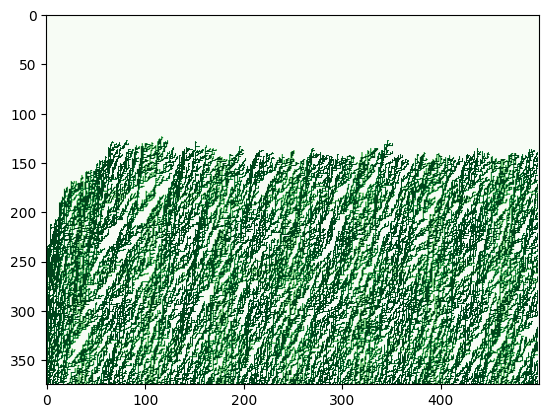

In [12]:
plt.imshow(image[::-1,:], cmap='Greens')
#image = np.zeros((3,3)) + np.array([[0,0,1],[0,0,0],[0,1,0]])

## Isolated Ballistic Deposition for a single starting point:

In [13]:
image = np.zeros((int(resolution*3/4),resolution))
image[:2,int(resolution/2)] = 1

while True:
    total_search = np.array([np.where(image == 1)[0], np.where(image == 1)[1]])
    x = np.random.randint(np.sort(total_search[1])[0]-1, np.sort(total_search[1])[-1]+2)
    x_mask = np.logical_and(total_search[1] >= x-1, total_search[1] <= x+1)
    mask = np.vstack((x_mask,x_mask))
    search = total_search*mask
    #search = np.where(image[:,x-1:x+2] == 1)
    isolate(x)
    if 1 in image[int(resolution/2),:]:
        break

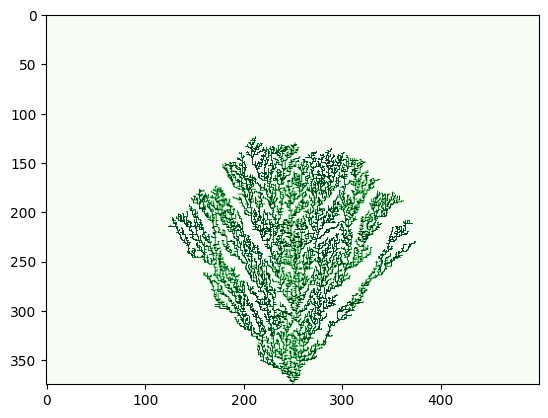

In [14]:
plt.imshow(image[::-1,:], cmap='Greens')

## Isolated Ballistic deposition with Random Walk (single staring point):

In [19]:
image = np.zeros((int(resolution*3/4), resolution), dtype=int)
while True:
    point = [0, np.random.randint(0,resolution)]
    while scan(point):
        point = random_walk(point)
    if point[0] == int(resolution*3/4)-1 and point[1] != int(resolution/2):
        continue
    image[*point] = 1
    if 1 in image[int(1/4*resolution),:]:
        break

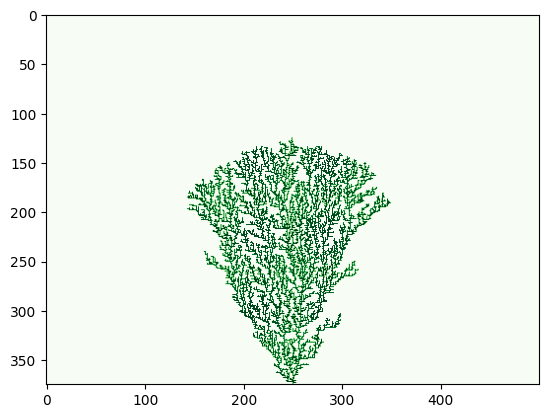

In [20]:
plt.imshow(image, cmap='Greens')

# Competitive Growth (downfall angle = 45 degrees)

In [17]:
layer = np.zeros(resolution)
while layer.max() < 1/2*resolution:
    x = np.random.randint(0,resolution)
    if x == 0:
        height = np.random.randint(0,int(3/4*resolution))
    else:
        height = int(3/4*resolution)-1
    path = free_path(height)
    if x >= int(resolution/4):
        path = path[:resolution-x]
    length = path.shape[0]
    check = (path - layer[x:x+length]) <= 1
    if True in check:
        impact_point = np.where(check == True)[0][0]
        layer[impact_point] += 1

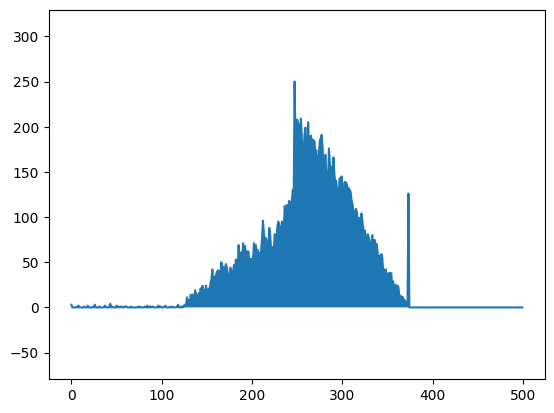

In [18]:
X = np.arange(resolution)
plt.axis('equal')
plt.fill_between(X, layer)
plt.plot(X,layer)